In [1]:
%matplotlib inline

In [2]:
#import Libraries
from bs4 import BeautifulSoup
import urllib.request
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Get the page contents
url_val = "http://publications.cse.iitm.ac.in/view/type/article.html"

page = urllib.request.urlopen(url_val).read()
soup = BeautifulSoup(page, "html.parser")

In [4]:
# Split the contents of the file
lines = []
for l in soup.findAll('p'):
    lines.append(l)

In [5]:
#Get all Co Author Info
coauthors = []
for l in soup.findAll('p'):
    cur_paper_auth = []
    for x in l.findAll('span'):
        cur_paper_auth.append(x.get_text())
    coauthors.append(cur_paper_auth)

In [6]:
cse_prof = [
        'Ravindran, Balaraman',
        'Chandrasekaran, Pandu Rangan',
        'N. S., Narayanaswamy',
        'Das, Sukhendu',
        'Mittal, Anurag',
        'Mutyam, Madhu',
        'Madhu, Mutyam',
        'Kumar, P. Sreenivasa',
        'Sreenivasa Kumar, P.',
        'D, Janakiram',
        'Dharanipragada, Janakiram',
        'Kamakoti, V.',
        'V, Kamakoti',
        'C, Siva Ram Murthy',
        'Khemani, Deepak',
        'Chakraborti, Sutanu',
        'C. Chandra, Sekhar',
        'A. Gonsalves, Timothy',
        'A. Murthy, Hema',
    ]

In [7]:
prof_id = {}
prof_id['Ravindran, Balaraman'] = 1
prof_id['Chandrasekaran, Pandu Rangan'] = 2
prof_id['N. S., Narayanaswamy'] = 3
prof_id['Das, Sukhendu'] = 4
prof_id['Mittal, Anurag'] = 5
prof_id['Mutyam, Madhu'] = 6
prof_id['Madhu, Mutyam'] = 6
prof_id['Kumar, P. Sreenivasa'] = 7
prof_id['Sreenivasa Kumar, P.'] = 7
prof_id['D, Janakiram'] = 8
prof_id['Dharanipragada, Janakiram'] = 8
prof_id['Kamakoti, V.'] = 9
prof_id['V, Kamakoti'] = 9
prof_id['C, Siva Ram Murthy'] = 10
prof_id['Khemani, Deepak'] = 11
prof_id['Chakraborti, Sutanu'] = 12
prof_id['C. Chandra, Sekhar'] = 13
prof_id['A. Murthy, Hema'] = 14
prof_id['A. Gonsalves, Timothy'] = 15

In [8]:
#Store as adjacency Matrix
adj_mat = np.zeros((16,16))

#Add element to adjacency matrix
def add_ele(x,y):
    ind1 = prof_id[x]
    ind2 = prof_id[y]
    adj_mat[ind1][ind2] = adj_mat[ind1][ind2]+1
    
#Check if x is a prof
def check_exists(x):
    if x in cse_prof:
        return True
    else:
        return False

In [9]:
#Populate Adj Matrix
for l in coauthors:
    for a1 in l:
        for a2 in l:
            if(check_exists(a1) and check_exists(a2) and a1!=a2):
                add_ele(a1,a2)

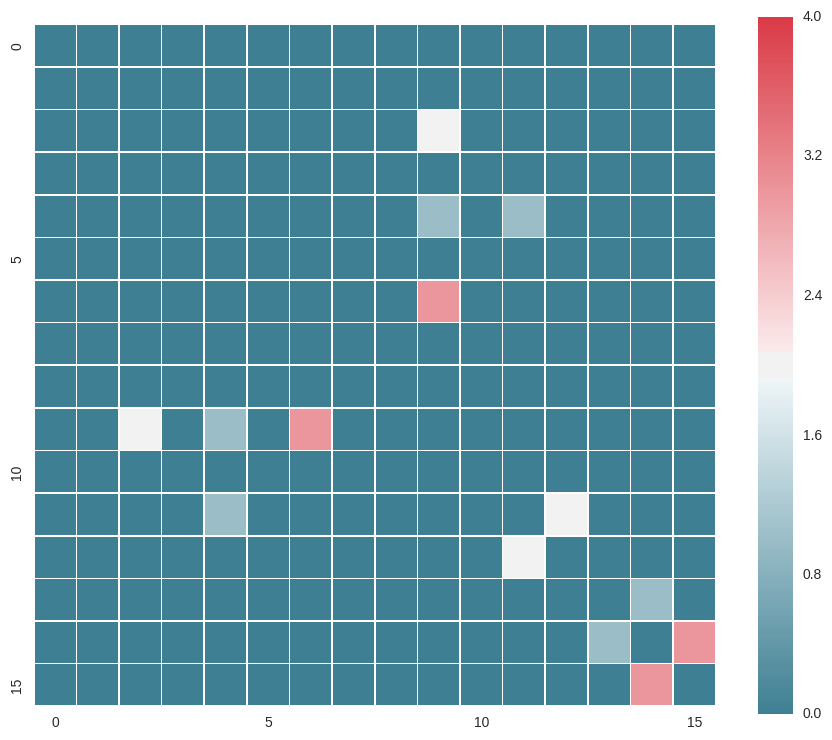

In [10]:
#Visualize Adj Matrix
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(adj_mat, cmap=cmap, vmax=4,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, ax=ax)